In [109]:
%matplotlib inline

import numpy                as np
import matplotlib.image     as mpimg
import matplotlib.pyplot    as plt
import matplotlib.animation as animation

In [110]:
def rgbTogray(im):
    try:
        gray = np.zeros_like(im)
        r, g, b = im[...,0], im[...,1], im[...,2]
        gray = (0.2126 * r + 0.7152 * g + 0.0722 * b) * 255
        return np.uint8(gray)
    except ValueError:
        print("ERROR: RGB image needed.")
        return im

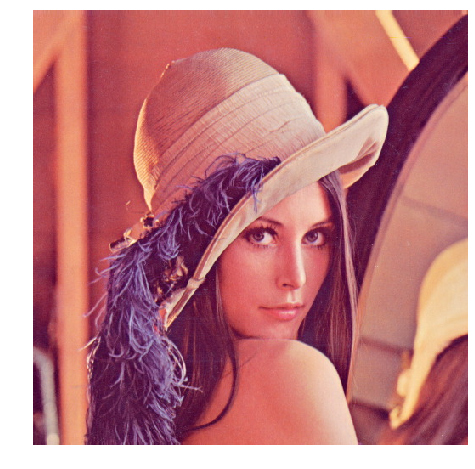

In [111]:
lena = mpimg.imread('../Images/Lena.png')
plt.figure(figsize=(8,8))
plt.imshow(lena)
plt.axis('off');

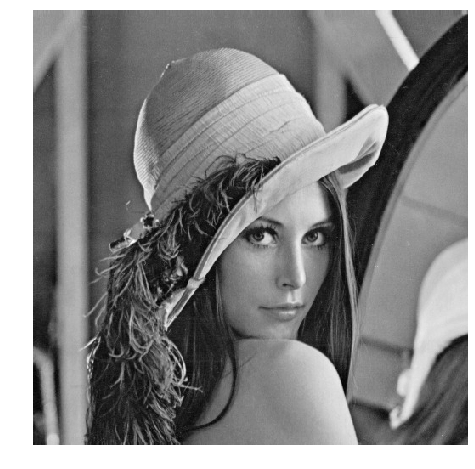

In [112]:
lena_gray = rgbTogray(lena)
plt.figure(figsize=(8,8))
plt.imshow(lena_gray, cmap='gray')
plt.axis('off');

In [113]:
def SobelOperator(image):
    Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    Gy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    feature_map_x = np.zeros_like(image, dtype=int)
    feature_map_y = np.zeros_like(image, dtype=int)
    magnitudes    = np.zeros_like(image, dtype=float)
    for l in range(1, image.shape[0]-1):
        for c in range(1, image.shape[1]-1):
            roi = image[l-1:l+2, c-1:c+2]
            feature_map_x[l, c] = np.sum(roi*Gx)
            feature_map_y[l, c] = np.sum(roi*Gy)
            magnitudes[l, c]    = (feature_map_x[l, c]**2 + feature_map_y[l, c]**2) ** 0.5
    return(magnitudes, feature_map_x, feature_map_y)    

In [114]:
mag, gx, gy = SobelOperator(lena_gray)

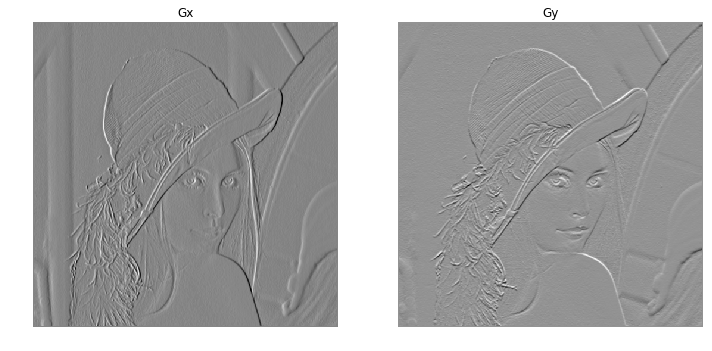

In [115]:
fig = plt.figure(figsize=(12,12))
a = fig.add_subplot(1,2,1)
a.set_title('Gx')
plt.imshow(gx, cmap='gray')
plt.axis('off')
a = fig.add_subplot(1,2,2)
a.set_title('Gy')
plt.axis('off')
plt.imshow(gy, cmap='gray');

In [116]:
def thresholdSobel(magnitudes, threshold):
    magnitudes = np.maximum(magnitudes, threshold)
    magnitudes[magnitudes == threshold] = 0
    return magnitudes

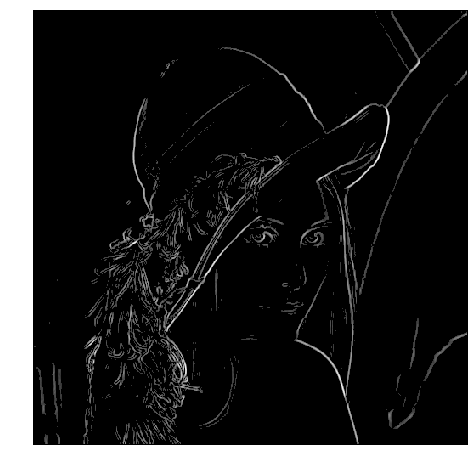

In [122]:
plt.figure(figsize=(8,8))
plt.imshow(thresholdSobel(mag, 150), cmap='gray')
plt.axis('off');

Check what happens while we change the threshold.

<img src="sobel_operator_threshold.gif" alt="Sobel Threshold Animation" style="width: 600px;"/>

https://imagemagick.org/script/download.php

In [156]:
%%capture
fig, ax = plt.subplots(figsize=(8,8))
ax.axis('off')
ax.set_title('')
threshold = np.arange(0, np.max(mag), 20)

In [157]:
def animateSobel(magnitudes, threshold):
    magnitudes = np.maximum(magnitudes, threshold)
    magnitudes[magnitudes == threshold] = 0
    return magnitudes

In [158]:
im = ax.imshow(animateSobel(mag, 0), animated=True, cmap='gray')

In [159]:
def updatefig(i):
    ax.set_title(f"Threshold = {threshold[i]}", fontsize=20, loc='left')
    im.set_array(animateSobel(mag, threshold[i]))
    return im,

In [160]:
ani = animation.FuncAnimation(fig, updatefig, frames=np.arange(0, threshold.shape[0]), interval=125, blit=True)
ani.save('sobel_operator_threshold.gif', dpi=80, writer='imagemagick')